In [1]:
import pandas as pd
import json

dfs = []

for i in range(1, 44):
    url = f"../data/people/people_{i}0.json"
    with open(url, 'r') as f:
        data = json.load(f)
        dfs.append(pd.read_json(json.dumps(data)))

df_orig = pd.concat(dfs)

In [2]:
df = df_orig

In [3]:
df.head()

,name,birth_day,birth_month,birth_year,birth_time,mercury_sign,mercury_pos_degrees,mercury_pos_minutes,mercury_house,mercury_retrograde,...,death_month,death_year,occupation,gender,uranus_retrograde,jupiter_retrograde,pluto_retrograde,saturn_retrograde,venus_retrograde,mars_retrograde
0,Gouverneur Morris,30,1.0,1752,01:44,Aquarius,2.0,51.0,3,1.0,...,NaN,1816,politician,Male,NaN,NaN,NaN,NaN,NaN,NaN
1,Adolfh Freiherr Knigge,16,10.0,1752,05:30,Libra,6.0,11.0,12,NaN,...,NaN,1796,writer,Male,1.0,NaN,NaN,NaN,NaN,NaN
2,George Rogers Clark,19,11.0,1752,None,Sagittarius,1.0,30.0,,NaN,...,NaN,1818,general,Male,NaN,1.0,NaN,NaN,NaN,NaN
3,Thomas Chatterton,20,11.0,1752,06:14,Sagittarius,2.0,21.0,1,NaN,...,NaN,1770,"writer, poet",Male,NaN,1.0,NaN,NaN,NaN,NaN
4,Solomon Drowne,11,3.0,1753,08:00,Pisces,12.0,55.0,11,NaN,...,NaN,1834,doctor,Male,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
politicians = df[df['occupation'] == 'politician']
politicians

,name,birth_day,birth_month,birth_year,birth_time,mercury_sign,mercury_pos_degrees,mercury_pos_minutes,mercury_house,mercury_retrograde,...,death_month,death_year,occupation,gender,uranus_retrograde,jupiter_retrograde,pluto_retrograde,saturn_retrograde,venus_retrograde,mars_retrograde
0,Gouverneur Morris,30,1.0,1752,01:44,Aquarius,2.0,51.0,3,1.0,...,NaN,1816,politician,Male,NaN,NaN,NaN,NaN,NaN,NaN
19,Hans Axel von Fersen,4,9.0,1755,None,Leo,29.0,32.0,,NaN,...,NaN,1810,politician,Male,1.0,NaN,NaN,1.0,NaN,NaN
26,Charles Perceval,1,10.0,1756,04:30,Libra,29.0,28.0,2,NaN,...,NaN,1840,politician,Male,1.0,NaN,NaN,1.0,NaN,NaN
32,Richard Burke Jr.,9,2.0,1758,07:30,Aquarius,11.0,36.0,12,1.0,...,NaN,1794,politician,Male,NaN,NaN,NaN,NaN,NaN,1.0
33,Fisher Ames,9,4.0,1758,09:30,Aries,13.0,7.0,11,NaN,...,NaN,1808,politician,Male,NaN,1.0,1.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,Kateřina Klasnová,,NaN,,None,Gemini,6.0,8.0,,NaN,...,NaN,NaN,politician,Male,1.0,NaN,1.0,NaN,NaN,NaN
608,Ondřej Liška,,NaN,,None,Leo,7.0,29.0,,NaN,...,NaN,NaN,politician,Male,1.0,NaN,NaN,NaN,NaN,NaN
154,Ivan Bartoš,,NaN,,None,Pisces,7.0,26.0,,NaN,...,NaN,NaN,politician,Male,1.0,1.0,1.0,1.0,NaN,1.0
887,Joseph P. III Kennedy,4,10.0,1980,21:42,Scorpio,6.0,19.0,5,NaN,...,NaN,NaN,politician,Male,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import sys
sys.path.insert(0, '../')
from preprocessing.utilities import preprocess_data, get_sign_pos, add_absolute_positions, add_aspects, remove_columns, clean_angles, clean_pos

In [7]:


df = preprocess_data(df)
df.shape

mercury


/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessing/utilities.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{planet}_{other_planet}_{aspect['name']}"] = df[f"{planet}_{other_planet}_angle"].apply(lambda x: abs(x - aspect['deg']) <= 5)
/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessing/utilities.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{planet}_{other_planet}_{aspect['name']}"] = df[f"{planet}_{other_planet}_angle"].apply(lambda x: abs(x - aspect['deg']) <= 5)
/mnt/d/DEV/outisfun/astro_ml/not

venus


/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessing/utilities.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{planet}_{other_planet}_angle"] = abs(df[f"{planet}_absolute_pos"] - df[f"{other_planet}_absolute_pos"])
/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessing/utilities.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{planet}_{other_planet}_{aspect['name']}"] = df[f"{planet}_{other_planet}_angle"].apply(lambda x: abs(x - aspect['deg']) <= 5)
/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessin

/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessing/utilities.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{planet}_{other_planet}_{aspect['name']}"] = df[f"{planet}_{other_planet}_angle"].apply(lambda x: abs(x - aspect['deg']) <= 5)
/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessing/utilities.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{planet}_{other_planet}_{aspect['name']}"] = df[f"{planet}_{other_planet}_angle"].apply(lambda x: abs(x - aspect['deg']) <= 5)
/mnt/d/DEV/outisfun/astro_ml/not

mars


/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessing/utilities.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{planet}_{other_planet}_{aspect['name']}"] = df[f"{planet}_{other_planet}_angle"].apply(lambda x: abs(x - aspect['deg']) <= 5)
/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessing/utilities.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{planet}_{other_planet}_{aspect['name']}"] = df[f"{planet}_{other_planet}_angle"].apply(lambda x: abs(x - aspect['deg']) <= 5)
/mnt/d/DEV/outisfun/astro_ml/not

jupiter
saturn


/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessing/utilities.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{planet}_{other_planet}_{aspect['name']}"] = df[f"{planet}_{other_planet}_angle"].apply(lambda x: abs(x - aspect['deg']) <= 5)
/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessing/utilities.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{planet}_{other_planet}_angle"] = abs(df[f"{planet}_absolute_pos"] - df[f"{other_planet}_absolute_pos"])
/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessin

uranus
neptune


/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessing/utilities.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{planet}_{other_planet}_angle"] = abs(df[f"{planet}_absolute_pos"] - df[f"{other_planet}_absolute_pos"])
/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessing/utilities.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{planet}_{other_planet}_{aspect['name']}"] = df[f"{planet}_{other_planet}_angle"].apply(lambda x: abs(x - aspect['deg']) <= 5)
/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessin

/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessing/utilities.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{planet}_{other_planet}_{aspect['name']}"] = df[f"{planet}_{other_planet}_angle"].apply(lambda x: abs(x - aspect['deg']) <= 5)
/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessing/utilities.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{planet}_{other_planet}_angle"] = abs(df[f"{planet}_absolute_pos"] - df[f"{other_planet}_absolute_pos"])
/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessin

moon
pluto
sun
mercury
venus
mars
jupiter
saturn
uranus
neptune
moon
pluto
sun


/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessing/utilities.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{planet}_{other_planet}_{aspect['name']}"] = df[f"{planet}_{other_planet}_angle"].apply(lambda x: abs(x - aspect['deg']) <= 5)
/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessing/utilities.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{planet}_{other_planet}_{aspect['name']}"] = df[f"{planet}_{other_planet}_angle"].apply(lambda x: abs(x - aspect['deg']) <= 5)
/mnt/d/DEV/outisfun/astro_ml/not

['mercury_pos_degrees', 'mercury_pos_minutes', 'venus_pos_degrees', 'venus_pos_minutes', 'mars_pos_degrees', 'mars_pos_minutes', 'jupiter_pos_degrees', 'jupiter_pos_minutes', 'saturn_pos_degrees', 'saturn_pos_minutes', 'uranus_pos_degrees', 'uranus_pos_minutes', 'neptune_pos_degrees', 'neptune_pos_minutes', 'moon_pos_degrees', 'moon_pos_minutes', 'pluto_pos_degrees', 'pluto_pos_minutes', 'sun_pos_degrees', 'sun_pos_minutes', 'house_AC_pos_degrees', 'house_AC_pos_minutes', 'house_2_pos_degrees', 'house_2_pos_minutes', 'house_3_pos_degrees', 'house_3_pos_minutes', 'house_IC_pos_degrees', 'house_IC_pos_minutes', 'house_5_pos_degrees', 'house_5_pos_minutes', 'house_6_pos_degrees', 'house_6_pos_minutes', 'house_DC_pos_degrees', 'house_DC_pos_minutes', 'house_8_pos_degrees', 'house_8_pos_minutes', 'house_9_pos_degrees', 'house_9_pos_minutes', 'house_MC_pos_degrees', 'house_MC_pos_minutes', 'house_11_pos_degrees', 'house_11_pos_minutes', 'house_12_pos_degrees', 'house_12_pos_minutes']


(20904, 269)

In [14]:
import matplotlib.pyplot as plt
nonzero_deaths = df[df['death_cause'] != 0]['death_cause']

# Print the selected rows
print(nonzero_deaths)

3         Suicide by Poisoning
10      Execution by Beheading
12                      Stroke
17        Execution by Hanging
18      Execution by Beheading
                 ...          
1150              Car Accident
1412                    Murder
1664         Murder by Gunshot
1866                  Accident
1999                    Murder
Name: death_cause, Length: 4130, dtype: object


Text(0.5, 1.0, 'Histogram of Death Causes')

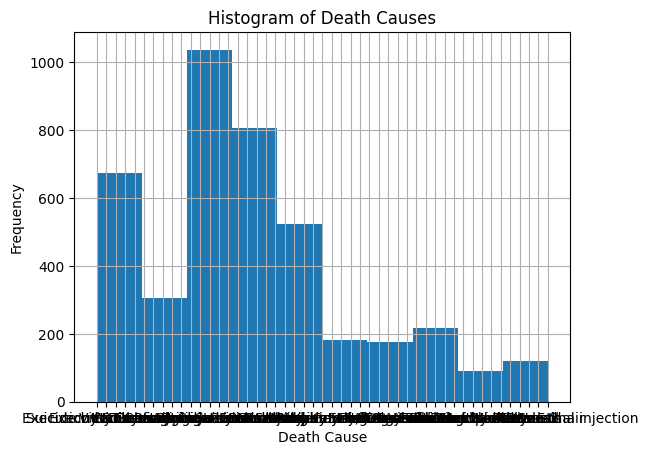

In [15]:
# Plot a histogram of the death_cause column
nonzero_deaths.hist()

# Add labels and title to the plot
plt.xlabel('Death Cause')
plt.ylabel('Frequency')
plt.title('Histogram of Death Causes')


In [8]:
cols_with_na = df.columns[df.isna().any()].tolist()

# print the names of columns with NaN values
if len(cols_with_na) > 0:
    print("The following columns have NaN values:", cols_with_na)
else:
    print("No columns have NaN values.")
    

No columns have NaN values.


In [9]:
df = df.drop(columns=["death_cause", "death_day", "death_month"])


In [459]:
cols_with_multiple_types = []
for col in df.columns:
    col_dtype = df[col].dtype
    if col_dtype == 'object':
        n_unique = df[col].nunique()
        if n_unique > 1:
            cols_with_multiple_types.append(col)
    else:
        unique_dtypes = df[col].apply(lambda x: type(x)).unique()
        if len(unique_dtypes) > 1:
            cols_with_multiple_types.append(col)

# print the names of columns with more than one value type
if len(cols_with_multiple_types) > 0:
    print("The following columns have more than one value type:", cols_with_multiple_types)
else:
    print("All columns have the same value type.")

The following columns have more than one value type: ['mercury_sign', 'venus_sign', 'mars_sign', 'sun_sign', 'moon_sign', 'jupiter_sign', 'saturn_sign', 'uranus_sign', 'neptune_sign', 'pluto_sign', 'house_AC_sign', 'house_2_sign', 'house_3_sign', 'house_IC_sign', 'house_5_sign', 'house_6_sign', 'house_DC_sign', 'house_8_sign', 'house_9_sign', 'house_MC_sign', 'house_11_sign', 'house_12_sign']


In [10]:
for col in df.columns:
    print(col)

name
mercury_sign
mercury_house
mercury_retrograde
venus_sign
venus_house
mars_sign
mars_house
sun_sign
sun_house
moon_sign
moon_house
jupiter_sign
jupiter_house
saturn_sign
saturn_house
uranus_sign
uranus_house
neptune_sign
neptune_house
neptune_retrograde
pluto_sign
pluto_house
house_AC_sign
house_2_sign
house_3_sign
house_IC_sign
house_5_sign
house_6_sign
house_DC_sign
house_8_sign
house_9_sign
house_MC_sign
house_11_sign
house_12_sign
uranus_retrograde
jupiter_retrograde
pluto_retrograde
saturn_retrograde
venus_retrograde
mars_retrograde
mercury_venus_conjunction
mercury_venus_sextile
mercury_venus_square
mercury_venus_trine
mercury_venus_opposition
mercury_mars_conjunction
mercury_mars_sextile
mercury_mars_square
mercury_mars_trine
mercury_mars_opposition
mercury_jupiter_conjunction
mercury_jupiter_sextile
mercury_jupiter_square
mercury_jupiter_trine
mercury_jupiter_opposition
mercury_saturn_conjunction
mercury_saturn_sextile
mercury_saturn_square
mercury_saturn_trine
mercury_satu

In [11]:
cols_to_encode = []
for col in df.columns:
    if df[col].nunique() >= 12 and df[col].nunique() < 20:
        cols_to_encode.append(col)

# perform one-hot encoding on selected columns
df_encoded = pd.get_dummies(df, columns=cols_to_encode)

# print the encoded dataframe
print(df_encoded)

                        name  mercury_retrograde  neptune_retrograde  \
0          Gouverneur Morris                 1.0                   1   
1     Adolfh Freiherr Knigge                 0.0                   0   
3          Thomas Chatterton                 0.0                   1   
4             Solomon Drowne                 0.0                   1   
6          Franz Carl Achard                 1.0                   0   
...                      ...                 ...                 ...   
1962            Gilles Simon                 0.0                   0   
1970              Sean Stone                 0.0                   0   
1972            LeBron James                 0.0                   0   
1974      Kady Zadora Riklis                 0.0                   0   
1999     Christielle Burbach                 0.0                   0   

      uranus_retrograde  jupiter_retrograde  pluto_retrograde  \
0                   0.0                 0.0                 0   
1    

In [13]:

names = df_encoded["name"]

In [14]:
df_clean = df_encoded.drop(columns=["name"])

In [18]:
import numpy as np

In [22]:
df_clean

,mercury_retrograde,neptune_retrograde,uranus_retrograde,jupiter_retrograde,pluto_retrograde,saturn_retrograde,venus_retrograde,mars_retrograde,mercury_venus_conjunction,mercury_venus_sextile,...,house_12_sign_Cancer,house_12_sign_Capricorn,house_12_sign_Gemini,house_12_sign_Leo,house_12_sign_Libra,house_12_sign_Pisces,house_12_sign_Sagittarius,house_12_sign_Scorpio,house_12_sign_Taurus,house_12_sign_Virgo
0,1.0,1,0.0,0.0,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.0,0,1.0,0.0,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,1,0.0,1.0,0,0.0,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.0,1,0.0,0.0,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,1.0,0,0.0,0.0,1,1.0,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1970,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1972,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1974,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [43]:
names.iloc[len(names) - 1]
len(df_clean)

20904

In [44]:
last_10_rows = df_clean.tail(10)
last_10_names = names.tail(10)
# create a new DataFrame with the last 10 rows of 'df'
new_df = pd.DataFrame(last_10_rows)

In [42]:
df_final = df_clean.reset_index(drop=True)
print(len(df_final))

20904


In [102]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

X=df_final

# split the data into a training set and a test set
X_train, X_test = train_test_split(X, test_size=5, random_state=42)

# scale the training data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# reduce the dimensionality of the training data using PCA
pca = PCA(n_components=100)
X_train_reduced = pca.fit_transform(X_train_scaled)

# create a NearestNeighbors instance with k=3
k = 3
nn = NearestNeighbors(n_neighbors=k)

# fit the nearest neighbors model to the training data
nn.fit(X_train_reduced)

# scale and reduce the dimensionality of the test data
X_test_scaled = scaler.transform(X_test)
X_test_reduced = pca.transform(X_test_scaled)

# find the indices of the 3 closest neighbors for each point in the test set
distances, indices = nn.kneighbors(X_test_reduced)

# display the indices of the 3 closest neighbors for each point in the test set
print("Indices of the 3 closest neighbors for each test point:")
for i in range(len(X_test)):
    print("Test point", i, ":", indices[i])

Indices of the 3 closest neighbors for each test point:
Test point 0 : [10585  5154  4882]
Test point 1 : [  444  7401 17811]
Test point 2 : [ 1659 17569 11214]
Test point 3 : [19403 17637 11591]
Test point 4 : [20072 16754  2507]


In [103]:
names.iloc[10585]

'Rhea White'

/home/outisfun/.pyenv/versions/3.10.6/envs/outenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


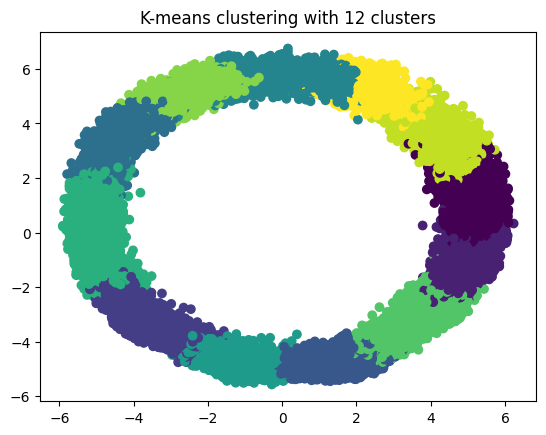

In [50]:
# choose the number of clusters to use in the K-means algorithm
n_clusters = 12

# apply the K-means algorithm to the preprocessed data
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
labels = kmeans.fit_predict(X_pca_train)

# evaluate the quality of the resulting clusters using the WSS metric
wss = kmeans.inertia_

# visualize the clusters using a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels, cmap='viridis')
plt.title(f'K-means clustering with {n_clusters} clusters')
plt.show()

In [64]:
new_point = X_pca_val[0]

In [67]:
new_point = new_point.reshape((1, 50))
new_point.shape

(1, 50)

In [56]:
X_pca_train.shape

(20894, 50)

In [75]:
from sklearn.neighbors import DistanceMetric

# 9
cluster_label = kmeans.predict(new_point)

# # filter the original dataset to only include points belonging to the predicted cluster
cluster_data = X_pca_train[kmeans.labels_ == cluster_label]
cluster_data

# # calculate the distances between the new point and each point in the cluster
distances = DistanceMetric.get_metric('euclidean').pairwise(new_point + cluster_data)

# # sort the points in the cluster by their distance to the new point
# sorted_indices = distances[0].argsort()

# # get the indices of the top k closest points in the cluster
# closest_indices = sorted_indices[1:k+1]

# # get the actual data points corresponding to the closest indices
# closest_points = cluster_data[closest_indices]

/home/outisfun/.pyenv/versions/3.10.6/envs/outenv/lib/python3.10/site-packages/sklearn/neighbors/_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


In [76]:
sorted_indices = distances[0].argsort()

# # get the indices of the top k closest points in the cluster
closest_indices = sorted_indices[1:k+1]

# # get the actual data points corresponding to the closest indices
closest_points = cluster_data[closest_indices]

In [78]:
closest_indices

array([453, 451, 549])

In [83]:
names = names.reset_index(drop=True)

names

In [93]:
names[453]
names[451]
last_10_names = last_10_names.reset_index(drop=True)
last_10_names[0]

'Robert Kubica'